In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("advertising (1)FSDS bootcamp2.0.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
numerical_features = data.dtypes[data.dtypes != "Object"].index

In [14]:
numerical_features

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

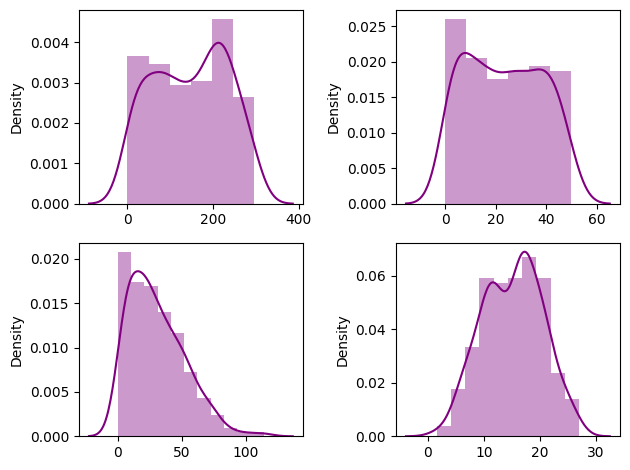

In [16]:
try:
    for i in range(0,len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.distplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

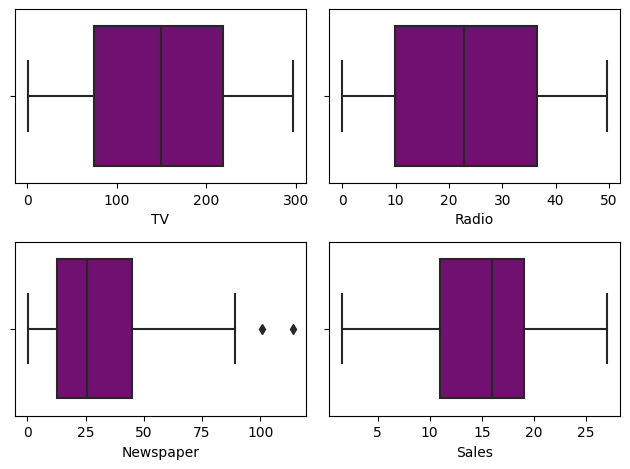

In [17]:
try:
    for i in range(0,len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

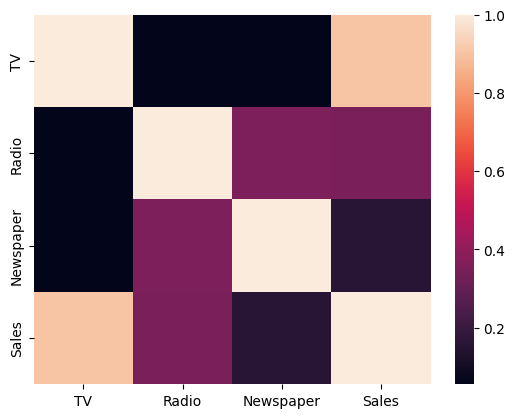

In [18]:
sns.heatmap(data.corr())

In [24]:
# divide indipendent and dependent variable
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [25]:
# train test split
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [37]:
# feature scalling using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

## LinearRegression

In [42]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [43]:
linear.fit(X_train,y_train)

LinearRegression()

In [44]:
linear.coef_

array([4.58720774, 1.48984025, 0.08791597])

In [45]:
linear.intercept_

15.330625000000003

In [46]:
y_predict = linear.predict(X_test)

In [47]:
y_predict

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [49]:
# MSE & MAS and r2 xcore
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
rmse = np.sqrt(mse)
print(rmse)

2.9077569102710923
1.2748262109549349
1.7052146229349232


In [53]:
# r2 and adjusted r2
r2 = r2_score(y_test,y_predict)
print(r2*100)
ar2 = 1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"Adjust R2 Accuracy is {ar2*100}%")

90.59011844150827
Adjust R2 Accuracy is 90.44608964214359%


## ridgeRegression

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [55]:
ridge.fit(X_train,y_train)

Ridge()

In [56]:
y_predict = ridge.predict(X_test)

In [57]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
rmse = np.sqrt(mse)
print(rmse)

2.915318013511375
1.273447172019252
1.7074302367919385


In [58]:
# r2 and adjusted r2
r2 = r2_score(y_test,y_predict)
print(r2*100)
ar2 = 1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"Adjust R2 Accuracy is {ar2*100}%")

90.56564972278859
Adjust R2 Accuracy is 90.42124640221903%


In [59]:
from sklearn.linear_model import Lasso
lesso = Lasso()

In [60]:
lesso.fit(X_train,y_train)

Lasso()

In [61]:
y_predict = lesso.predict(X_test)

In [62]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
rmse = np.sqrt(mse)
print(rmse)

5.493708384763458
1.7891448881743948
2.343866119206355


In [63]:
# r2 and adjusted r2
r2 = r2_score(y_test,y_predict)
print(r2*100)
ar2 = 1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"Adjust R2 Accuracy is {ar2*100}%")

82.22164135010256
Adjust R2 Accuracy is 81.94952361566536%


In [64]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [65]:
elastic.fit(X_train,y_train)

ElasticNet()

In [67]:
y_predict = elastic.predict(X_test)

In [68]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
rmse = np.sqrt(mse)
print(rmse)

8.075873133138368
2.2846187375805997
2.8418080746486676


In [69]:
# r2 and adjusted r2
r2 = r2_score(y_test,y_predict)
print(r2*100)
ar2 = 1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"Adjust R2 Accuracy is {ar2*100}%")

73.86541859953734
Adjust R2 Accuracy is 73.46539949646903%
